In [4]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg' 
from pylab import rcParams
rcParams['figure.figsize'] = 11, 7

In [5]:
df = pd.read_csv('extention_ZAlizadeh_san_preprocessed.csv') 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 60 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             303 non-null    int64 
 1   Age                    303 non-null    int64 
 2   Weight                 303 non-null    int64 
 3   Length                 303 non-null    int64 
 4   Sex                    303 non-null    int64 
 5   BMI                    303 non-null    object
 6   DM                     303 non-null    int64 
 7   HTN                    303 non-null    int64 
 8   Current Smoker         303 non-null    int64 
 9   EX-Smoker              303 non-null    int64 
 10  FH                     303 non-null    int64 
 11  Obesity                303 non-null    int64 
 12  CRF                    303 non-null    int64 
 13  CVA                    303 non-null    int64 
 14  Airway disease         303 non-null    int64 
 15  Thyroid Disease        

In [10]:
df.shape

(303, 60)

In [9]:
df.isnull().sum()

Unnamed: 0               0
Age                      0
Weight                   0
Length                   0
Sex                      0
BMI                      0
DM                       0
HTN                      0
Current Smoker           0
EX-Smoker                0
FH                       0
Obesity                  0
CRF                      0
CVA                      0
Airway disease           0
Thyroid Disease          0
CHF                      0
DLP                      0
BP                       0
PR                       0
Edema                    0
Weak Peripheral Pulse    0
Lung rales               0
Systolic Murmur          0
Diastolic Murmur         0
Typical Chest Pain       0
Dyspnea                  0
Function Class           0
Atypical                 0
Nonanginal               0
Exertional CP            0
LowTH Ang                0
Q Wave                   0
St Elevation             0
St Depression            0
Tinversion               0
LVH                      0
P

In [12]:
useful_cols = ['Age', 'FBS', 'LDL', 'BUN', 
               'Weight', 'ESR', 'BP',
               'VHD', 'TG', 'WBC','EF-TTE'
              ]
df[useful_cols].head(10)

,Age,FBS,LDL,BUN,Weight,ESR,BP,VHD,TG,WBC,EF-TTE
0,53,90,155,8,90,7,110,2,250,5700,50
1,67,80,121,30,70,26,140,2,309,7700,40
2,54,85,70,17,54,10,100,0,103,7400,40
3,66,78,55,30,67,76,100,3,63,13000,55
4,50,104,110,16,87,27,110,3,170,9200,50
5,50,86,119,13,75,18,118,2,139,7300,50
6,55,80,85,12,80,38,110,0,83,9400,40
7,72,130,90,19,80,4,130,0,80,12200,45
8,58,69,90,15,84,5,90,2,79,5100,50
9,60,209,90,16,71,8,130,2,80,4900,40


<AxesSubplot:xlabel='Age'>

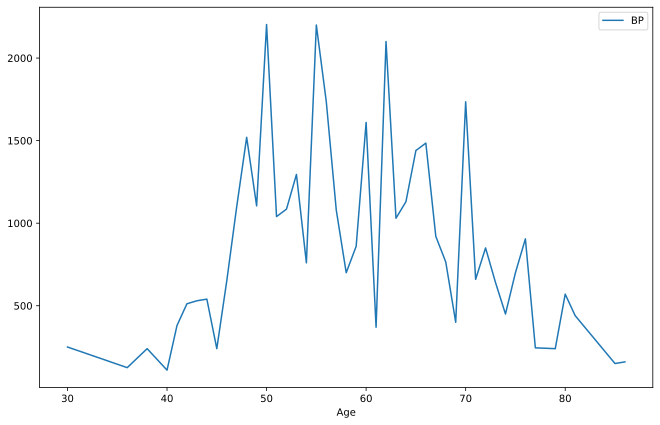

In [13]:
BP_df = df[[x for x in df.columns if 'BP' in x] + ['Age']]
BP_df.groupby('Age').sum().plot()

<AxesSubplot:xlabel='Weight'>

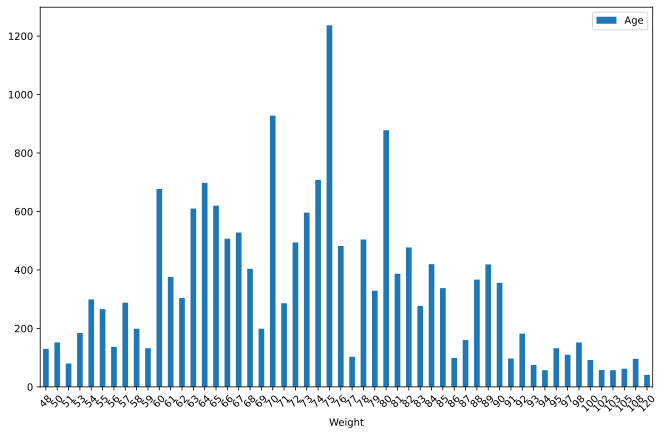

In [14]:
weight_df = df[[x for x in df.columns if 'Weight' in x] + ['Age']]
weight_df.groupby('Weight').sum().plot(kind='bar', rot=45)

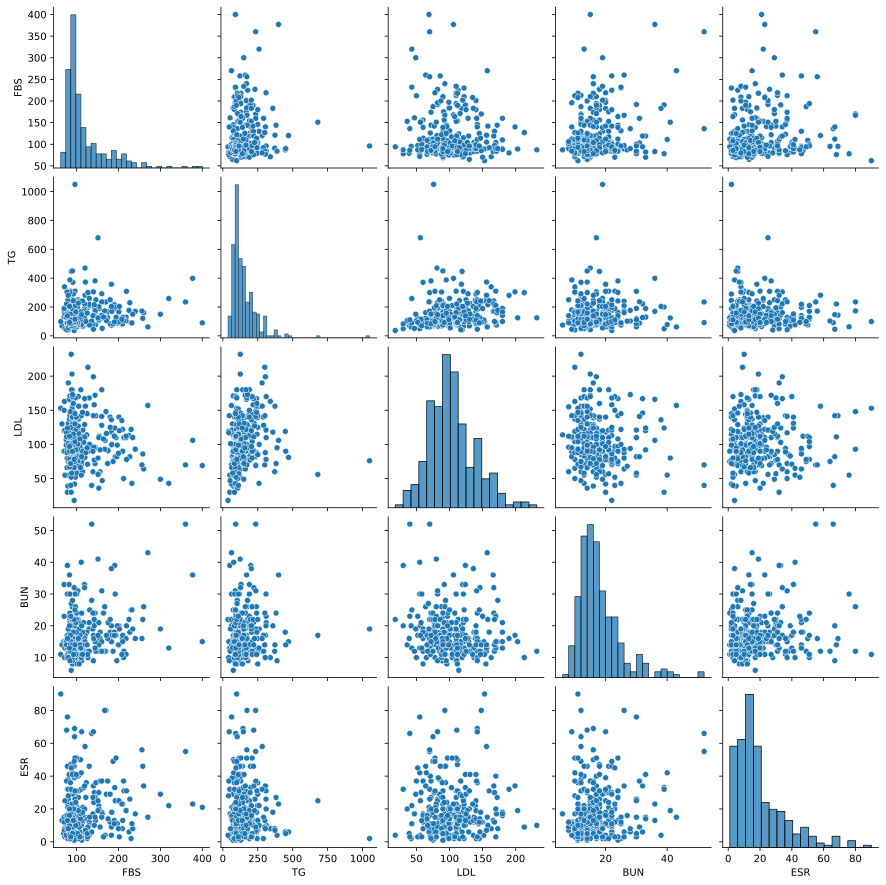

In [15]:
cols = ['FBS', 'TG', 'LDL', 'BUN', 'ESR']
sns_plot = sns.pairplot(df[cols])

D:\Users\DZHALIL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='WBC', ylabel='Density'>

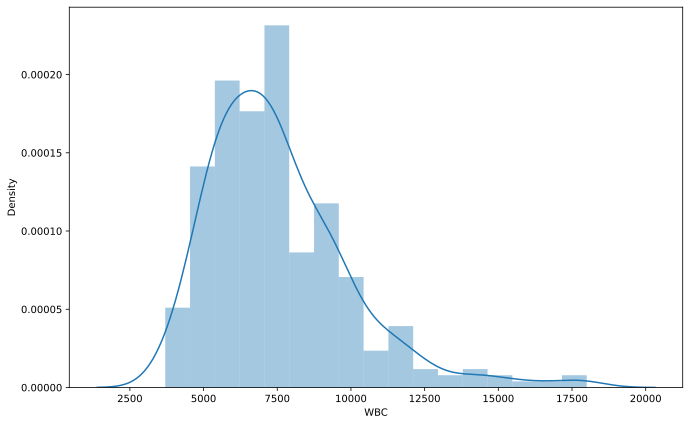

In [16]:
sns.distplot(df.WBC)

<AxesSubplot:xlabel='ESR', ylabel='Age'>

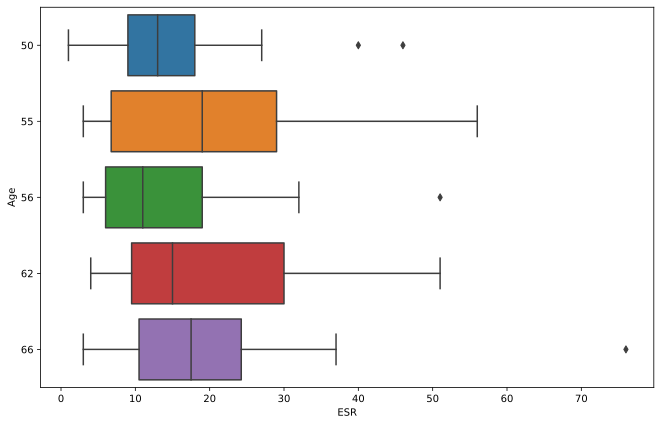

In [17]:
top_age = df.Age.value_counts().sort_values(ascending = False).head(5).index.values
sns.boxplot(y="Age", x="ESR", data=df[df.Age.isin(top_age)], orient="h")

<AxesSubplot:xlabel='EF-TTE', ylabel='VHD'>

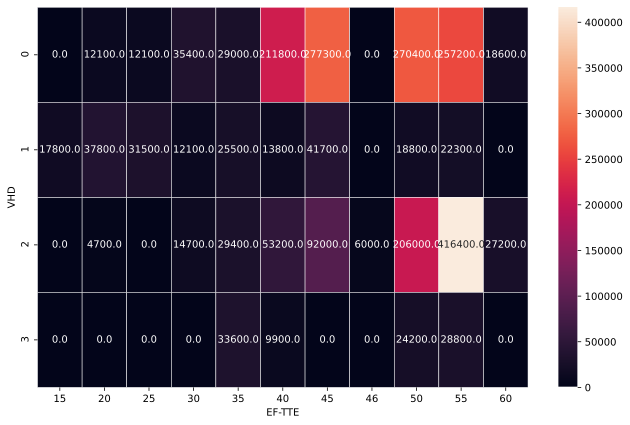

In [18]:
VHD_EFTTE_WBC = df.pivot_table(
                        index='VHD', 
                        columns='EF-TTE', 
                        values='WBC', 
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(VHD_EFTTE_WBC, annot=True, fmt=".1f", linewidths=.5)